# 分类模型建模调参

## 【任务描述】   
使用sklearn进行分类模型的建模和调参：  
1. 掌握调用sklearn库中的预置模型建模的方法；
2. 掌握常用的分类模型调参技巧；
3. 能够对分类模型进行评估和优化。
    
## 【任务准备】    
学员已完成分类数据特征工程实践课程，已保存完成特征工程的数据。        

## 【任务实施】    
### 步骤 1: 启动Jupyter Notebook    
+ 在搜索栏输入"cmd"命令，启动命令提示符窗口。    
+ 输入"jupyter notebook"命令，并按回车键启动Jupyter Notebook。   
    
### 步骤 2: 创建新的Notebook    
+ 在Jupyter的Web界面中，点击右上角的 "New" 按钮。    
+ 选择 "Python 3"内核来创建一个新的Python 3 Notebook。    
    
### 步骤 3: 导入必要的库
+ 使用numpy和pandas库来进行数据处理，使用sklearn、lightgbm和xgboost库来进行数据的建模预测和评估，使用matplotlib和seaborn来进行数据的可视化。

In [1]:
# 数据处理库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# 模型预测库
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 参数搜索和评价库
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

# 定义字体，在图表中正常显示汉字
plt.rcParams['font.sans-serif'] = ['SimHei']
# 在图表中正常显示负号
plt.rcParams['axes.unicode_minus'] = False

#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')

### 步骤 4: 导入数据集

In [2]:
data_FE = pd.read_csv('data_FE.csv')
data_FE

,是否幸存,仓位等级,兄弟姐妹个数,父母子女个数,票价,登船港口,年龄段,性别分类_female,性别分类_male,性别分类_unknown,客舱_labelEncode,船票信息_labelEncode
0,0,3,1,0,7.2500,1,2,0,1,0,135,409
1,1,1,1,0,71.2833,2,3,1,0,0,74,472
2,1,3,0,0,7.9250,1,2,1,0,0,135,533
3,1,1,1,0,53.1000,1,3,1,0,0,50,41
4,0,3,0,0,8.0500,1,3,0,1,0,135,374
...,...,...,...,...,...,...,...,...,...,...,...,...
710,0,3,0,5,29.1250,3,3,1,0,0,135,378
711,0,2,0,0,13.0000,1,2,0,1,0,135,84
712,1,1,0,0,30.0000,1,2,1,0,0,27,13
713,1,1,0,0,30.0000,2,2,0,1,0,54,9


### 步骤 5: 切割训练集和测试集    
* 按比例切割训练集和测试集(一般测试集的比例有30%、25%、20%、15%和10%)
* 按目标变量分层进行等比切割
* 设置随机种子以便结果能复现

In [3]:
X = data_FE.iloc[:,1:]
y = data_FE.iloc[:,:1]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
# 查看数据形状
X_train.shape, X_test.shape

((536, 11), (179, 11))

### 步骤 6: 模型创建     
6.1 创建基于线性模型的分类模型（逻辑回归）

In [4]:
# 默认参数逻辑回归模型
lr = LogisticRegression()
lr.fit(X_train, y_train)
# 查看训练集和测试集score值
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.80
Testing set score: 0.76


In [5]:
# 调整参数后的逻辑回归模型
lr2 = LogisticRegression(C=100)
lr2.fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr2.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(lr2.score(X_test, y_test)))

Training set score: 0.81
Testing set score: 0.77


6.2 创建基于树的分类模型（随机森林）

In [6]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print("Training set score: {:.2f}".format(rfc.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(rfc.score(X_test, y_test)))

Training set score: 1.00
Testing set score: 0.77


In [7]:
# 调整参数后的随机森林分类模型
rfc2 = RandomForestClassifier(n_estimators=100, max_depth=5)
rfc2.fit(X_train, y_train)
print("Training set score: {:.2f}".format(rfc2.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(rfc2.score(X_test, y_test)))

Training set score: 0.87
Testing set score: 0.80


### 步骤 7: 输出模型预测结果    
* 输出模型预测分类标签
* 输出不通分类标签的预测概率

In [8]:
# 预测标签
pred = lr.predict(X_train)
pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,

In [9]:
# 预测标签概率
pred_proba = lr.predict_proba(X_train)
pred_proba

array([[0.78673133, 0.21326867],
       [0.89755559, 0.10244441],
       [0.37928636, 0.62071364],
       ...,
       [0.6032195 , 0.3967805 ],
       [0.43883354, 0.56116646],
       [0.07981926, 0.92018074]])

### 步骤 8: 模型评估    
* 模型评估是为了知道模型的泛化能力。
* 交叉验证（cross-validation）是一种评估泛化性能的统计学方法，它比单次划分训练集和测试集的方法更加稳定、全面。
* 在交叉验证中，数据被多次划分，并且需要训练多个模型。
* 最常用的交叉验证是 k 折交叉验证（k-fold cross-validation），其中 k 是由用户指定的数字，通常取 5 或 10。
* 准确率（precision）度量的是被预测为正例的样本中有多少是真正的正例
* 召回率（recall）度量的是正类样本中有多少被预测为正类
* f-分数是准确率与召回率的调和平均

In [10]:
lr = LogisticRegression(C=100)
scores = cross_val_score(lr, X_train, y_train, cv=10)
# k折交叉验证分数
scores

array([0.72222222, 0.77777778, 0.75925926, 0.81481481, 0.68518519,
       0.81481481, 0.86792453, 0.83018868, 0.88679245, 0.83018868])

In [11]:
# 平均交叉验证分数
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.80


### 步骤 9: 混淆矩阵      
* 计算二分类问题的混淆矩阵
* 计算精确率、召回率以及f-分数

In [12]:
# 训练模型
lr = LogisticRegression(C=100)
lr.fit(X_train, y_train)
# 模型预测结果
pred = lr.predict(X_train)
# 混淆矩阵
confusion_matrix(y_train, pred)

array([[278,  41],
       [ 62, 155]], dtype=int64)

In [13]:
# 精确率、召回率以及f1-score
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       319
           1       0.79      0.71      0.75       217

    accuracy                           0.81       536
   macro avg       0.80      0.79      0.80       536
weighted avg       0.81      0.81      0.81       536



### 步骤 10: 绘制ROC曲线    

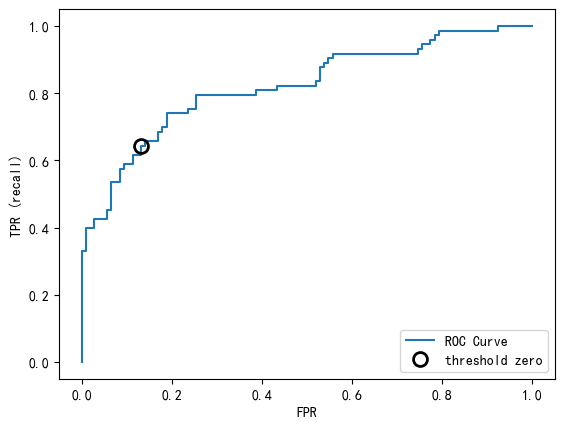

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, lr.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# 找到最接近于0的阈值
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## 【任务总结】    
做数据分析的目的，就是运用数据、结合业务来得到某些我们想要知道的结果。    
分析的第一步就是建模，搭建一个预测模型或者其他模型。    
从模型得到预测结果之后，还要要分析这个模型是不是足够可靠，这样就需要评估这个模型。